In [14]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
import numpy as np 


In [15]:
df=pd.read_csv("insurance.csv")

In [16]:
df.head()

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 104.8+ KB


In [19]:
pd.set_option("display.float_format","{:.2f}".format)

In [25]:
sns.set(style="whitegrid", palette="Set2",font_scale=1.1)

In [28]:
df.isna().sum()

Id               0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [29]:
df.dropna(inplace=True)

In [30]:
df.isna().sum().sum()

np.int64(0)

In [33]:
df.describe(include='all')

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
count,1332.00,1332.00,1332,1332.00,1332.00,1332,1332.00,1332,1332,1332.00
unique,NaN,NaN,2,NaN,NaN,2,NaN,2,4,NaN
top,NaN,NaN,male,NaN,NaN,No,NaN,No,southeast,NaN
freq,NaN,NaN,670,NaN,NaN,695,NaN,1058,442,NaN
mean,674.47,38.09,NaN,30.66,94.19,NaN,1.10,NaN,NaN,13325.25
std,384.70,11.11,NaN,6.12,11.45,NaN,1.21,NaN,NaN,12109.62
min,1.00,18.00,NaN,16.00,80.00,NaN,0.00,NaN,NaN,1121.87
25%,341.75,29.00,NaN,26.20,86.00,NaN,0.00,NaN,NaN,4760.16
50%,674.50,38.00,NaN,30.35,92.00,NaN,1.00,NaN,NaN,9412.97
75%,1007.25,47.00,NaN,34.73,99.00,NaN,2.00,NaN,NaN,16781.33


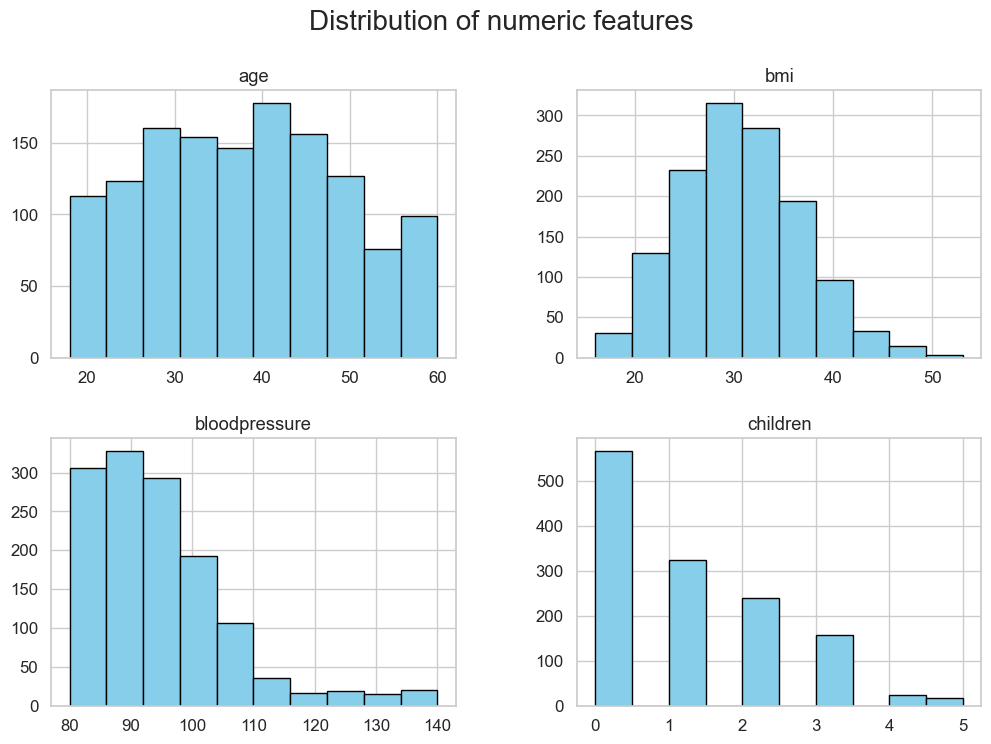

In [34]:
numeric_col=['age','bmi','bloodpressure','children']
df[numeric_col].hist(bins=10,figsize=(12,8),color = "skyblue",edgecolor="black")
plt.suptitle("Distribution of numeric features",fontsize=20)
plt.show()


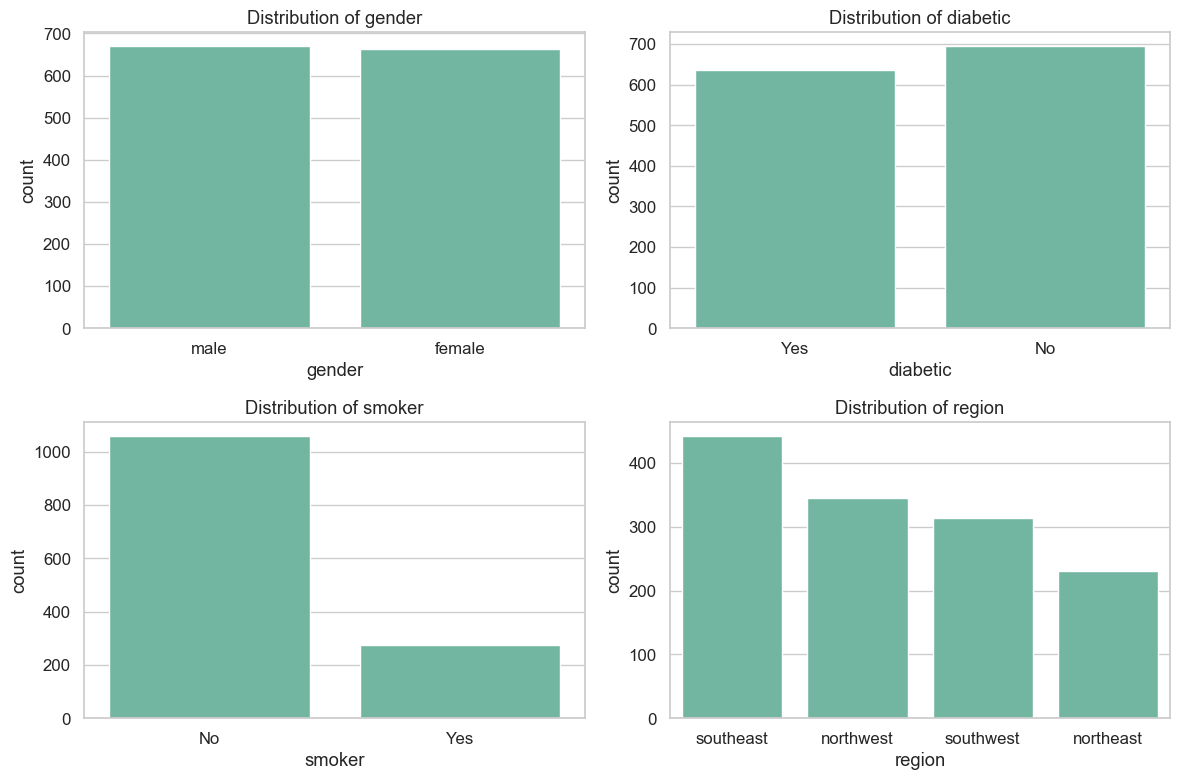

In [45]:
cat_cols = ["gender",'diabetic', 'smoker', 'region']

plt.figure(figsize=(12,8))

for i, col in enumerate(cat_cols,1):
    plt.subplot(2,2,i)
    sns.countplot(data = df, x = col)
    plt.title(f"Distribution of {col}") 

plt.tight_layout()
plt.show()   


In [46]:
df.groupby(['smoker','gender'])["claim"].mean().round(2)

smoker  gender
No      female    8762.30
        male      8169.25
Yes     female   30679.00
        male     33042.01
Name: claim, dtype: float64

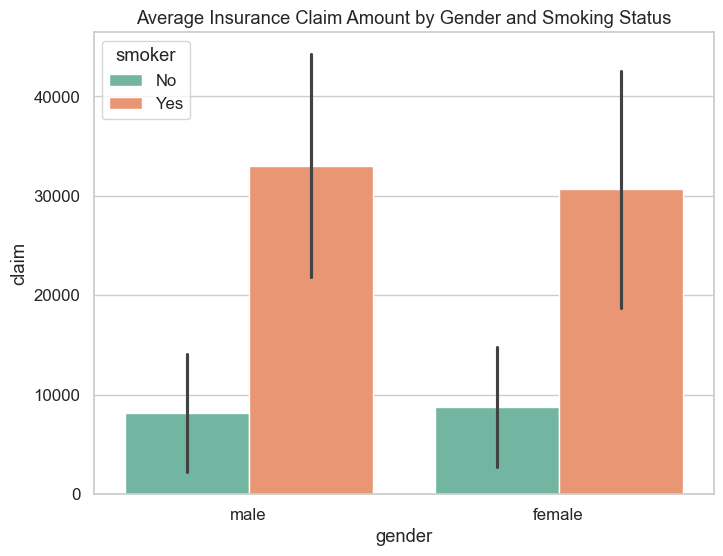

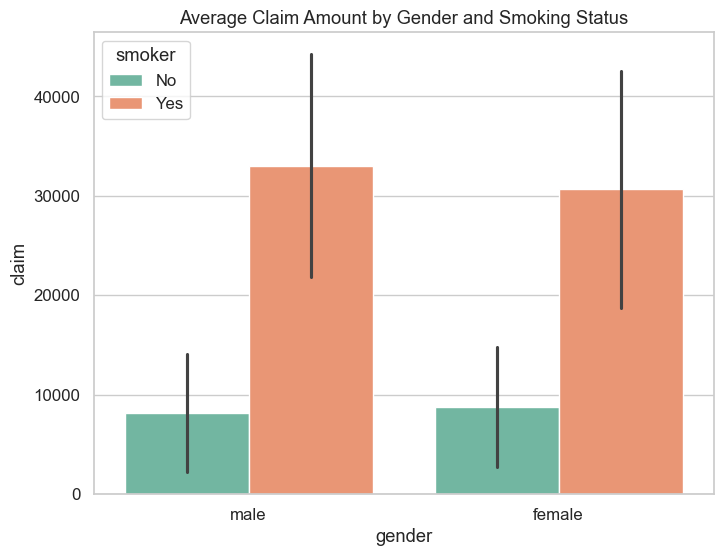

In [50]:
plt.figure(figsize=(8,6))
sns.barplot(data=df,x="gender",y="claim",hue="smoker",estimator="mean",errorbar="sd")
plt.title("Average Insurance Claim Amount by Gender and Smoking Status")
plt.show()
plt.figure(figsize=(8,6))
sns.barplot(data=df,x="gender",y="claim",hue="smoker",estimator="mean",errorbar="sd")
plt.title("Average Claim Amount by Gender and Smoking Status")
plt.show()


In [51]:
pivot_region_diabetic = df.groupby(['region', 'diabetic'])['claim'].mean().unstack()

In [52]:
pivot_region_diabetic

diabetic,No,Yes
region,,
northeast,16966.86,16818.30
northwest,11442.83,12224.96
southeast,13578.72,12574.09
southwest,13069.91,12313.74


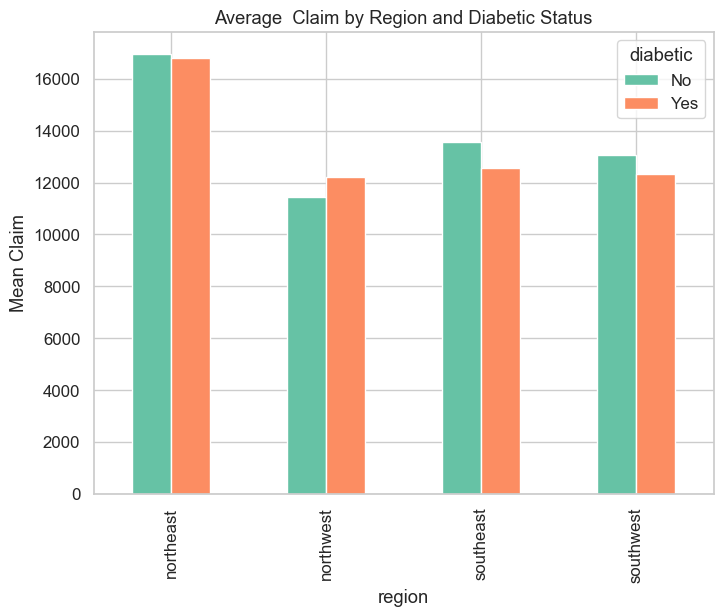

In [53]:
pivot_region_diabetic.plot(kind='bar', figsize=(8, 6))
plt.title('Average  Claim by Region and Diabetic Status')
plt.ylabel('Mean Claim')
plt.show()

In [57]:
pivot_table = pd.pivot_table(df, values = 'claim', index = 'children', columns = 'region', aggfunc = 'mean')
pivot_table


region,northeast,northwest,southeast,southwest
children,,,,
0,14876.09,10162.80,12828.44,12748.45
1,20011.93,10009.61,12401.44,10515.92
2,16556.02,13464.31,13998.49,17483.49
3,19202.76,17786.16,14850.25,10402.44
4,16139.19,11347.02,12802.72,14933.26
5,9222.40,8965.80,9050.90,8444.16


In [58]:
numeric_col

['age', 'bmi', 'bloodpressure', 'children']

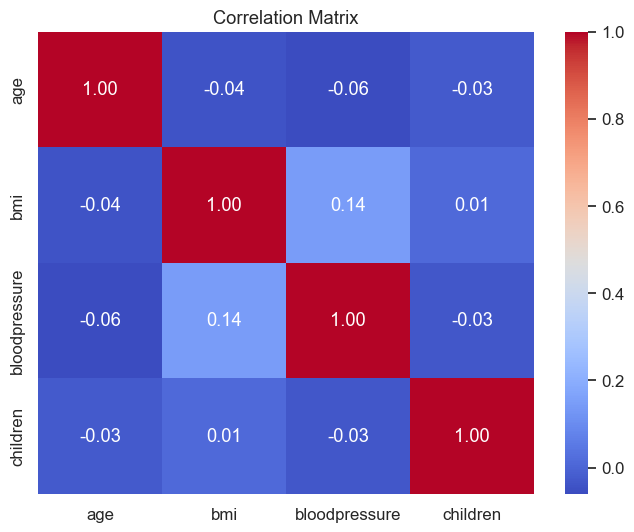

In [61]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_col].corr(), annot=True, cmap = "coolwarm",fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

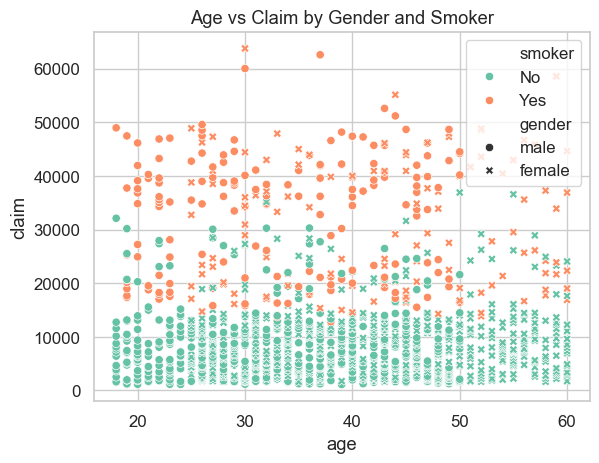

In [62]:
sns.scatterplot(data=df,x="age",y="claim",hue="smoker",style="gender")
plt.title("Age vs Claim by Gender and Smoker")
plt.show()